In [3]:
%pylab inline
from ray_tracing import *
from density_profile import *
from astropy import units 
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

In [5]:
def reading_data(data):
    halos = np.loadtxt(data)
    h = 0.7
    ids = halos[:,0]
    x = halos[:,1]/h
    y = halos[:,2]/h
    z = halos[:,3]/h
    M = halos[:,4]/h
    R = halos[:,5]/h
    return ids, x, y, z, M, R

In [6]:
ids, x, y, z, M, R = reading_data('Periodic_Illustris3.txt')

In [7]:
# Selecting the emitters halos and founding their envinromentals properties 
ids_emit, x_emit, y_emit, z_emit, D3_mean, M_emit, R_emit = host_halos(M, x, y, z, ids, R)

In [8]:
print D3_mean

12293.0349947


In [9]:
## Selecting halos in a sphere around the emitter halo, and counting the number of possible abosrbers around the halo.
N_abs = np.zeros(len(x_emit))
N_abs_hm = np.zeros(len(x_emit))
for i in range(len(x_emit)):
    x_abs, y_abs, z_abs, R_abs, M_abs, id_abs = selecting_halos(x_emit[i], y_emit[i], z_emit[i], 10000, x, y, z, R, M, ids)
    x_abs2, y_abs2, z_abs2, R_abs2, M_abs2, id_abs2 = selecting_halos(x_emit[i], y_emit[i], z_emit[i], 10000, x_emit, y_emit, z_emit, R_emit, M_emit, ids_emit)
    N_abs[i] = len(x_abs)
    N_abs_hm[i] = len(x_abs2)

134.016148325 5.52033492823


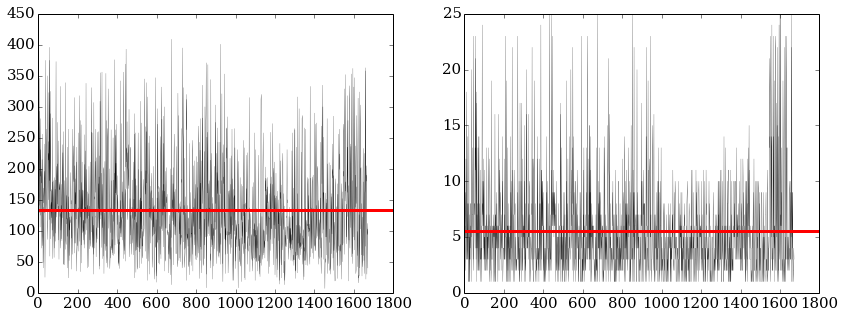

In [10]:
#Plotting the distance to number of absorbers inside the sphere.
figure(figsize(14, 5))
subplot(1, 2, 1)
plot(N_abs, c='k', alpha=1, lw=0.2)
axhline(mean(N_abs), c='r', lw=3)

subplot(1, 2, 2)
plot(N_abs_hm, c='k', lw=0.2)
axhline(mean(N_abs_hm), c='r', lw=3)
        
print mean(N_abs), average(N_abs_hm)

In [11]:
#scatter(x, y, alpha=0.5, s=0.1)
#scatter(x_emit, y_emit, alpha=0.5, s=10, c='r')

In [12]:
print "Number of emitters", len(M_emit)
print "NUmber of halos", len(M)

Number of emitters 1672
NUmber of halos 69702


In [13]:
# This is the environment for each halo, with respect to the 5th neighboor.
d3 = np.zeros(len(M_emit))
r3 = np.zeros(len(M_emit))
for i in range(len(M_emit)):
    d3[i], r3[i] = environment(x_emit[i], y_emit[i], z_emit[i], x_emit, y_emit, z_emit, D3_mean)

(-2, 110)

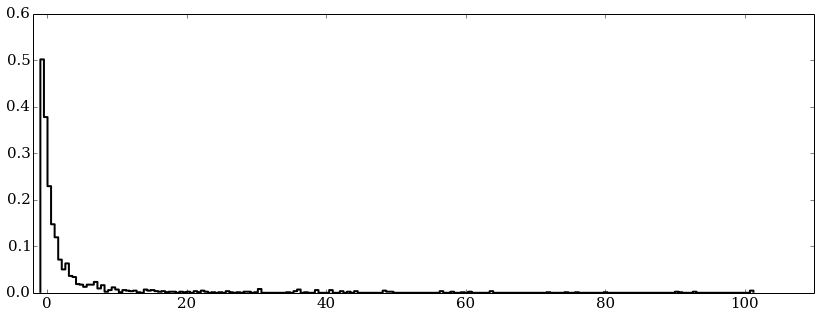

In [14]:
hd = hist(d3, bins=200, normed=True, histtype='step', color='k', lw=2)
#xscale('log')
xlim(-2, 110)

<matplotlib.colorbar.Colorbar instance at 0x7feeab3dbd88>

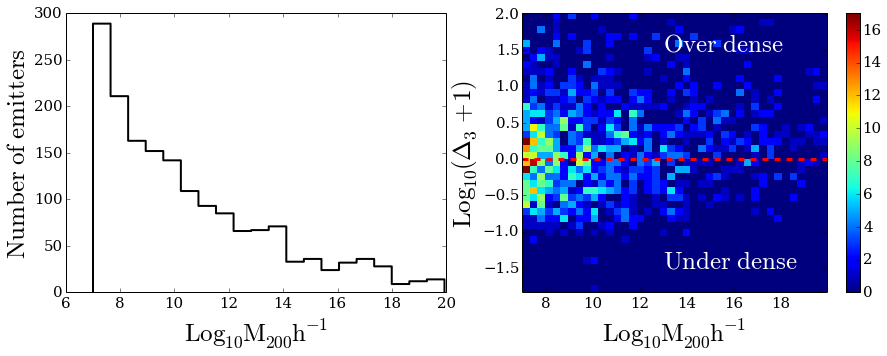

In [15]:
figure(figsize=(15, 5))

subplot(1, 2, 1)
h = hist(M_emit, bins=20, color='k', lw=2, histtype='step')
#h0 = hist(M, bins=50,  histtype='step')
#yscale('log')
ylim(0, 300)
xlabel('$\mathrm{Log_{10}M_{200} h^{-1}}$', fontsize=25)
ylabel('$\mathrm{Number\ of\ emitters}$', fontsize=25)
savefig('../../figures/emitters_hist.eps', bbox_inches='tight')

subplot(1, 2, 2)

h2 = hist2d(M_emit, log10(d3+1), bins=40)
xlabel('$\mathrm{Log_{10}M_{200} h^{-1}}$', fontsize=25)
ylabel('$\mathrm{Log_{10}(\Delta_3+1)}$', fontsize=25)
axhline(0.0, c='r', lw=3.0, ls='--')
plt.text(13, -1.5, '$\mathrm{Under\ dense}$', color='white', fontsize=25)
plt.text(13, 1.5, '$\mathrm{Over\ dense}$', color='white', fontsize=25)
#axhline(mean(log10(d3+1)), c='r', lw=2.0)
colorbar()
#yscale('log')
#savefig('../../figures/absorbers_prop.pdf', bbox_inches='tight')

In [16]:
# Lets compute the hydrogen column density for one halo.
d3_under = -0.4
d3_over = 0.4
def emitters_selection_u(M_max, M_min):
    emitter = np.where((M_emit<M_max) & (M_emit>M_min) & (d3<d3_under))[0]
    return M_emit[emitter], d3[emitter], x_emit[emitter], y_emit[emitter], z_emit[emitter], r3[emitter]

def emitters_selection_o(M_max, M_min):
    emitter = np.where((M_emit<M_max) & (M_emit>M_min) & (d3>d3_over))[0]
    return M_emit[emitter], d3[emitter], x_emit[emitter], y_emit[emitter], z_emit[emitter], r3[emitter]

def emitters_selection_m(M_max, M_min):
    emitter = np.where((M_emit<M_max) & (M_emit>M_min) & (d3<d3_over) & (d3>d3_under))[0]
    return M_emit[emitter], d3[emitter], x_emit[emitter], y_emit[emitter], z_emit[emitter], r3[emitter]

In [17]:
M1, d3_1, x1, y1, z1, r3_1 = emitters_selection_u(8, 7)
M2, d3_2, x2, y2, z2, r3_2 = emitters_selection_m(8, 7)
M3, d3_3, x3, y3, z3, r3_3 = emitters_selection_o(8, 7)

M4, d3_4, x4, y4, z4, r3_4 = emitters_selection_u(12, 11)
M5, d3_5, x5, y5, z5, r3_5 = emitters_selection_m(12, 11)
M6, d3_6, x6, y6, z6, r3_6 = emitters_selection_o(12, 11)

M7, d3_7, x7, y7, z7, r3_7 = emitters_selection_u(16, 15)
M8, d3_8, x8, y8, z8, r3_8 = emitters_selection_m(16, 15)
M9, d3_9, x9, y9, z9, r3_9 = emitters_selection_o(16, 15)

M10, d3_10, x10, y10, z10, r3_10 = emitters_selection_u(20, 18)
M11, d3_11, x11, y11, z11, r3_11 = emitters_selection_m(20, 18)
M12, d3_12, x12, y12, z12, r3_12 = emitters_selection_o(20, 18)



In [18]:
Ray_length = 10000.0
def NH_comp(N, X, Y, Z):
    NH_tot = []
    for i in range(len(X)):
        x_c1, y_c1, z_c1, R_c1, M_c1, ids_c1 = selecting_halos(X[i], Y[i], Z[i], Ray_length, 
                                                               x_emit, y_emit, z_emit, R_emit, M_emit, ids_emit)
        for j in range(N):
            x_out, y_out, z_out = random_direction(X[i], Y[i], Z[i], Ray_length)
            b_abs, x_abs, y_abs, z_abs, R_abs, M_abs, id_abs = impact_parameter(ids_c1, x_c1, y_c1, z_c1, Ray_length,
                                                                                X[i], Y[i], Z[i], R_c1, M_c1, x_out, y_out, z_out)
            if len(b_abs)>0:
                NH_T = []
                for k in range(len(b_abs)):
                    NH_T.append(nh(R_abs[k], b_abs[k], M_abs[k]))
                NH_tot.append(sum(NH_T))
    return NH_tot

In [19]:
NH_tot1 = NH_comp(1000, x1, y1, z1)
NH_tot2 = NH_comp(1000, x2, y2, z2)
NH_tot3 = NH_comp(1000, x3, y3, z3)


In [20]:
NH_tot4 = NH_comp(10000, x4, y4, z4)
NH_tot5 = NH_comp(10000, x5, y5, z5)
NH_tot6 = NH_comp(10000, x6, y6, z6)


In [21]:
NH_tot7 = NH_comp(20000, x7, y7, z7)
NH_tot8 = NH_comp(20000, x8, y8, z8)
NH_tot9 = NH_comp(20000, x9, y9, z9)


In [22]:
NH_tot10 = NH_comp(30000, x10, y10, z10)
NH_tot11 = NH_comp(30000, x11, y11, z11)
NH_tot12 = NH_comp(30000, x12, y12, z12)

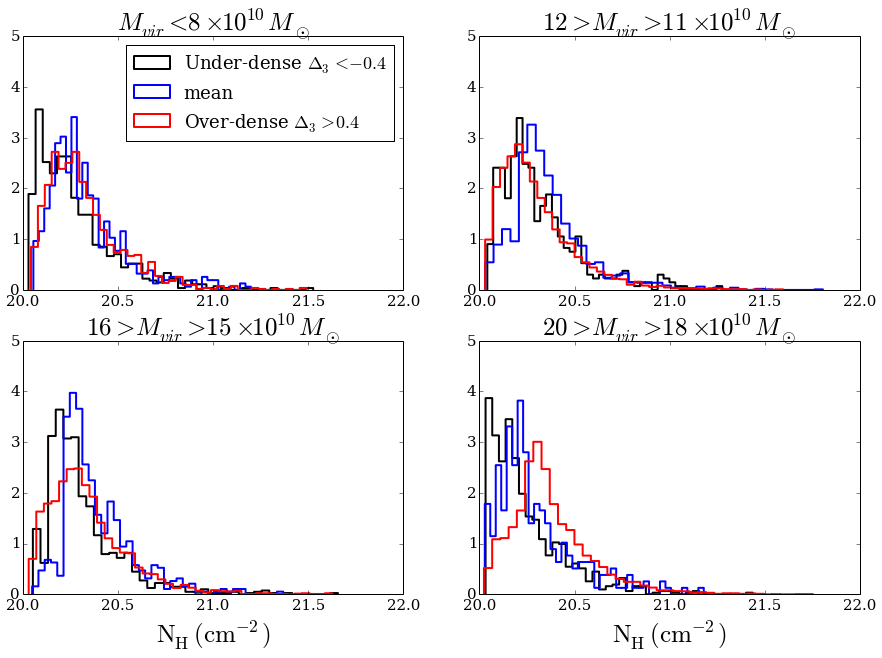

In [23]:
figure(figsize=(15, 10))
subplot(2, 2, 1)
title(r'$M_{vir}<8 \times 10^{10}M_{\odot}$', fontsize=25)
h1 = hist(log10(NH_tot1), bins=40, normed=True, histtype='step', lw=2, color='k', label='Under-dense $\Delta_3<-0.4$')
h2 = hist(log10(NH_tot2), bins=40, normed=True, histtype='step', lw=2, color='b', label='mean')
h3 = hist(log10(NH_tot3), bins=40, normed=True, histtype='step', lw=2, color='r', label='Over-dense $\Delta_3>0.4$')
legend()
#xlabel('$\mathrm{N_H(cm^{-2})}$', fontsize=25)
#axvline(mean(log10(NH_tot)), c='k', lw=2)
#legend()
xlim(20, 22)
ylim(0, 5)

subplot(2, 2, 2)
title(r'$12 > M_{vir}>11\times 10^{10}M_{\odot}$', fontsize=25)
h4 = hist(log10(NH_tot4), bins=40, normed=True, histtype='step', lw=2, color='k', label='Under-dense')
h5 = hist(log10(NH_tot5), bins=40, normed=True, histtype='step', lw=2, color='b', label='mean')
h6 = hist(log10(NH_tot6), bins=40, normed=True, histtype='step', lw=2, color='r', label='Over-dense')
xlim(20, 22)
ylim(0, 5)

subplot(2, 2, 3)
title(r'$16 > M_{vir}>15\times 10^{10}M_{\odot}$', fontsize=25)
h7 = hist(log10(NH_tot7), bins=40, normed=True, histtype='step', lw=2, color='k', label='Under-dense')
h8 = hist(log10(NH_tot8), bins=40, normed=True, histtype='step', lw=2, color='b', label='mean')
h9 = hist(log10(NH_tot9), bins=40, normed=True, histtype='step', lw=2, color='r', label='Over-dense')
xlabel('$\mathrm{N_H(cm^{-2})}$', fontsize=25)
xlim(20, 22)
ylim(0, 5)

subplot(2, 2, 4)
title(r'$20 > M_{vir}>18\times 10^{10}M_{\odot}$', fontsize=25)
h10 = hist(log10(NH_tot10), bins=40, normed=True, histtype='step', lw=2, color='k', label='Under-dense')
h11 = hist(log10(NH_tot11), bins=40, normed=True, histtype='step', lw=2, color='b', label='mean')
h12 = hist(log10(NH_tot12), bins=40, normed=True, histtype='step', lw=2, color='r', label='Over-dense')
xlim(20, 22)
ylim(0, 5)
xlabel('$\mathrm{N_H(cm^{-2})}$', fontsize=25)
savefig('../../figures/NHvsMvsD3.pdf', bbox_inches='tight')

In [24]:
H_0 = 3.2407789E-18  / units.s * 0.7
H_0 = H_0.to(units.km / units.s / units.Mpc)
Omega0 = 0.27

def concentration(M):
    c = 9.6*(M/1E12)**(-0.075)
    return c

def H(z):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z):
    return Omega0 * (1+z)**3 * (H_0/H(z))**2

def Dvir(z):# from the solution of the top hat model! 
    Omegaz = Omega_z(z)
    x = Omegaz - 1
    Deltavir =  ((18*np.pi**2) +  (82*x) - 39*x**2) / Omegaz
    return Deltavir

def rvir(Mvir):
    z = 6.0
    h = 0.704
    rv = 206/h * (Dvir(z) * Omega0 / 97.2)**(-1.0/3.0) * (Mvir*h/(1E12))**(1.0/3.0)
    rv = rv * units.kpc
    return rv

In [25]:
cc1 = concentration(1E12)
Rvir1 = rvir(1E11)
print cc1, Rvir1
NH = nh(251, 10, cc)

9.6 152.680782958 kpc


NameError: name 'cc' is not defined

In [ ]:
Mass = logspace(10, 11, 100)
b = linspace(0, 300, 100)
NH_all = np.zeros(100)
NH_one = np.zeros(100)

In [161]:
for i in range(len(Mass)):
    cc_all = concentration(Mass[i])
    Rvir = rvir(Mass[i])
    NH_all[i] = nh(Rvir.value, 10.0, cc_all)
    NH_one[i] = nh(Rvir1.value, b[i], cc1 )

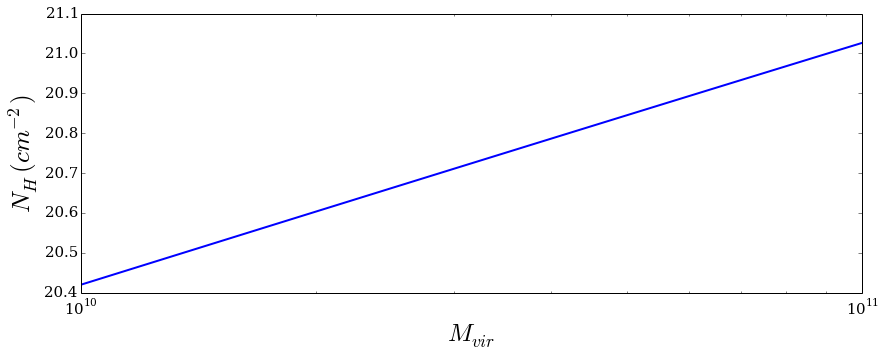

In [148]:
plot(Mass, log10(NH_all), lw=2)
xscale('log')
xlabel('$M_{vir}$', fontsize=25)
ylabel('$N_H (cm^{-2})$', fontsize=25)

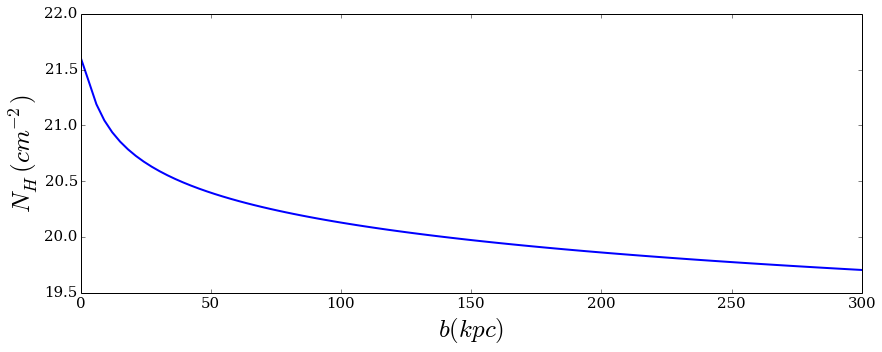

In [149]:
plot(b, log10(NH_one), lw=2)
xlabel('$b(kpc)$', fontsize=25)
ylabel('$N_H (cm^{-2})$', fontsize=25)

In [150]:
Omega_m = 0.27
Omega_b = 0.045
gubv = 4.5E-13
NSSH = 4E-3

def NHtonh(NH, T):
    f_g = Omega_b / Omega_m 
    T_4 = T/1E4
    nh =  NH**2 / ((1.6E21)**2*T_4*(f_g/0.17))
    return nh

def nhtoNH(nh, T):
    f_g = Omega_b / Omega_m 
    T_4 = T/1E4
    NH =  (1.6E21*T_4**0.5*(f_g/0.17))**(0.5) * nh**(0.5)
    return NH  
    
def lamda_t(t): # cm3/s equation a6, rahmati et al 2013
    return 1.17E-10 * t**(0.5) * np.exp(-157809.0/t) / (1.0 + np.sqrt(t/10**5))

def alpha_a(t): # cm3 / s equation a3
    l = 315614/t
    return 1.269E-13 * l**(1.503) / (1 + (l/0.522)**(0.47))**1.923

def gammaphot(gammauvb, nh, nhssh):
    gammap =  gammauvb*(0.98*(1.0+ (nh /nhssh)**(1.64))**(-2.28) + 0.02 * (1 + nh  / nhssh)**(-0.84))
    return gammap
 
def abc(t, g, nh, nssh):
    a_a = alpha_a(t)
    lt = lamda_t(t)
    gphot = gammaphot(g, nh, nssh)
    a = a_a + lt
    b = 2.0*a_a + gphot / nh + lt
    c = a_a
    return a, b, c
 
def eta(a, b, c):
    e = (b - np.sqrt(b**2.0 - 4.0*a*c)) / (2.0*a)
    return e
 
def tvir(m, z):
    t = 2554.0 * (m / 1E6)**(2/3.)*((1 + z) / 31.0)
    return t

In [152]:
T1 = tvir(M1*1E4, 6)
T2 = tvir(M2*1E4, 6)

T3 = tvir(M3*1E4, 6)
T4 = tvir(M4*1E4, 6)
T = 1E4
#print T1, T2, T3, T4

In [163]:
nh1 = np.zeros(len(NH_tot1))
for i in range(len(NH_tot1)):
    nh1[i] = NHtonh(NH_tot1[i], T)
    
nh2 = np.zeros(len(NH_tot2))
for i in range(len(NH_tot2)):
    nh2[i] = NHtonh(NH_tot2[i], T)
    
nh3 = np.zeros(len(NH_tot3))
for i in range(len(NH_tot3)):
    nh3[i] = NHtonh(NH_tot3[i], T)
    
    
nh4 = np.zeros(len(NH_tot4))
for i in range(len(NH_tot4)):
    nh4[i] = NHtonh(NH_tot4[i], T)
    
nh5 = np.zeros(len(NH_tot5))
for i in range(len(NH_tot5)):
    nh5[i] = NHtonh(NH_tot5[i], T)
        
nh6 = np.zeros(len(NH_tot6))
for i in range(len(NH_tot6)):
    nh6[i] = NHtonh(NH_tot6[i], T)
    
    
nh7 = np.zeros(len(NH_tot7))
for i in range(len(NH_tot7)):
    nh7[i] = NHtonh(NH_tot7[i], T)
    
nh8 = np.zeros(len(NH_tot8))
for i in range(len(NH_tot8)):
    nh8[i] = NHtonh(NH_tot8[i], T)
    
nh9 = np.zeros(len(NH_tot9))
for i in range(len(NH_tot9)):
    nh9[i] = NHtonh(NH_tot9[i], T)
    
    
nh10 = np.zeros(len(NH_tot10))
for i in range(len(NH_tot10)):
    nh10[i] = NHtonh(NH_tot10[i], T)
    
nh11 = np.zeros(len(NH_tot11))
for i in range(len(NH_tot11)):
    nh11[i] = NHtonh(NH_tot11[i], T)
    
nh12 = np.zeros(len(NH_tot12))
for i in range(len(NH_tot12)):
    nh12[i] = NHtonh(NH_tot12[i], T)

In [164]:
#figure(figsize=(15, 5))
#subplot(1, 2, 1)
#h3 = hist(log10(nh1), normed=True, bins=40)

#subplot(1, 2, 2)
#h4 = hist(log10(nh2), normed=True, bins=40)

In [165]:
A1, B1, C1 = abc(T, gubv, nh1, NSSH)
A2, B2, C2 = abc(T, gubv, nh2, NSSH)
A3, B3, C3 = abc(T, gubv, nh3, NSSH)
A4, B4, C4 = abc(T, gubv, nh4, NSSH)

A5, B5, C5 = abc(T, gubv, nh5, NSSH)
A6, B6, C6 = abc(T, gubv, nh6, NSSH)
A7, B7, C7 = abc(T, gubv, nh7, NSSH)
A8, B8, C8 = abc(T, gubv, nh8, NSSH)

A9, B9, C9 = abc(T, gubv, nh9, NSSH)
A10, B10, C10 = abc(T, gubv, nh10, NSSH)
A11, B11, C11 = abc(T, gubv, nh11, NSSH)
A12, B12, C12 = abc(T, gubv, nh12, NSSH)

Eta1 = eta(A1, B1, C1)
Eta2 = eta(A2, B2, C2)
Eta3 = eta(A3, B3, C3)
Eta4 = eta(A4, B4, C4)

Eta5 = eta(A1, B5, C1)
Eta6 = eta(A2, B6, C2)
Eta7 = eta(A3, B7, C3)
Eta8 = eta(A4, B8, C4)

Eta9 = eta(A9, B9, C9)
Eta10 = eta(A10, B10, C10)
Eta11 = eta(A11, B11, C11)
Eta12 = eta(A12, B12, C12)

nhI1 = nh1 * Eta1
nhI2 = nh2 * Eta2
nhI3 = nh3 * Eta3
nhI4 = nh4 * Eta4

nhI5 = nh5 * Eta5
nhI6 = nh6 * Eta6
nhI7 = nh7 * Eta7
nhI8 = nh8 * Eta8

nhI9 = nh9 * Eta9
nhI10 = nh10 * Eta10
nhI11 = nh11 * Eta11
nhI12 = nh12 * Eta12

In [166]:
NHI1 = nhtoNH(T, nhI1)
NHI2 = nhtoNH(T, nhI2)
NHI3 = nhtoNH(T, nhI3)
NHI4 = nhtoNH(T, nhI4)

NHI5 = nhtoNH(T, nhI5)
NHI6 = nhtoNH(T, nhI6)
NHI7 = nhtoNH(T, nhI7)
NHI8 = nhtoNH(T, nhI8)

NHI9 = nhtoNH(T, nhI9)
NHI10 = nhtoNH(T, nhI10)
NHI11 = nhtoNH(T, nhI11)
NHI12 = nhtoNH(T, nhI12)

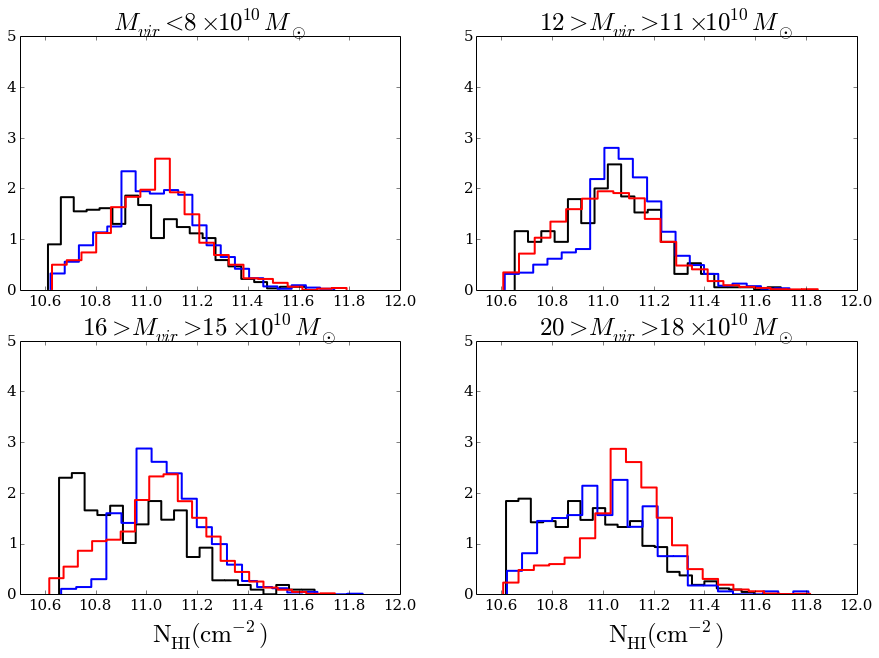

In [178]:
figure(figsize=(15, 10))
subplot(2, 2, 1)
title(r'$M_{vir}<8 \times 10^{10}M_{\odot}$', fontsize=25)
h = hist(log10(NHI1), normed=True, bins=20, histtype='step', lw=2, color='k')
h = hist(log10(NHI2), normed=True, bins=20, histtype='step', lw=2, color='b')
h = hist(log10(NHI3), normed=True, bins=20, histtype='step', lw=2, color='r')
ylim(0, 5)
xlim(10.5, 12)

subplot(2, 2, 2)
title(r'$12 > M_{vir}>11\times 10^{10}M_{\odot}$', fontsize=25)
h = hist(log10(NHI4), normed=True, bins=20, histtype='step', lw=2, color='k')
h = hist(log10(NHI5), normed=True, bins=20, histtype='step', lw=2, color='b')
h = hist(log10(NHI6), normed=True, bins=20, histtype='step', lw=2, color='r')
ylim(0, 5)
xlim(10.5, 12)

subplot(2, 2, 3)
title(r'$16 > M_{vir}>15\times 10^{10}M_{\odot}$', fontsize=25)
h = hist(log10(NHI7), normed=True, bins=20, histtype='step', lw=2, color='k')
h = hist(log10(NHI8), normed=True, bins=20, histtype='step', lw=2, color='b')
h = hist(log10(NHI9), normed=True, bins=20, histtype='step', lw=2, color='r')
ylim(0, 5)
xlim(10.5, 12)
xlabel('$\mathrm{N_{HI}(cm^{-2})}$', fontsize=25)


subplot(2, 2, 4)
title(r'$20 > M_{vir}>18\times 10^{10}M_{\odot}$', fontsize=25)

h = hist(log10(NHI10), normed=True, bins=20, histtype='step', lw=2, color='k')
h = hist(log10(NHI11), normed=True, bins=20, histtype='step', lw=2, color='b')
h = hist(log10(NHI12), normed=True, bins=20, histtype='step', lw=2, color='r')
ylim(0, 5)
xlim(10.5, 12)
xlabel('$\mathrm{N_{HI}(cm^{-2})}$', fontsize=25)

savefig('../../figures/NHIvsMvsD3.pdf', bbox_inches='tight')